In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print (pd.__version__)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

df = pd.read_csv("/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv", dtype={'publish_date': object})

df['publish_month'] = df.publish_date.str[:6]
df['publish_year'] = df.publish_date.str[:4]
df['publish_month_only'] = df.publish_date.str[4:6]
df['publish_day_only'] = df.publish_date.str[6:8]

df['dt_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['dt_month'] = pd.to_datetime(df['publish_month'], format='%Y%m')

print (df.info())

2.0.3
india-headlines-news-dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876557 entries, 0 to 3876556
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   publish_date        object        
 1   headline_category   object        
 2   headline_text       object        
 3   publish_month       object        
 4   publish_year        object        
 5   publish_month_only  object        
 6   publish_day_only    object        
 7   dt_date             datetime64[ns]
 8   dt_month            datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 266.2+ MB
None


In [3]:
df.head()

,publish_date,headline_category,headline_text,publish_month,publish_year,publish_month_only,publish_day_only,dt_date,dt_month
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,200101,2001,01,02,2001-01-02,2001-01-01
1,20010102,unknown,Fissures in Hurriyat over Pak visit,200101,2001,01,02,2001-01-02,2001-01-01
2,20010102,unknown,America's unwanted heading for India?,200101,2001,01,02,2001-01-02,2001-01-01
3,20010102,unknown,For bigwigs; it is destination Goa,200101,2001,01,02,2001-01-02,2001-01-01
4,20010102,unknown,Extra buses to clear tourist traffic,200101,2001,01,02,2001-01-02,2001-01-01


In [4]:
df.describe(include='all')

,publish_date,headline_category,headline_text,publish_month,publish_year,publish_month_only,publish_day_only,dt_date,dt_month
count,3876557,3876557,3876557,3876557,3876557,3876557,3876557,3876557,3876557
unique,8170,1024,3604755,270,23,12,31,NaN,NaN
top,20141010,india,Straight Answers,201605,2016,05,22,NaN,NaN
freq,706,307371,6723,21698,255910,333880,128443,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-01 10:55:27.614066176,2014-02-14 17:07:22.869173760
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-02 00:00:00,2001-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-27 00:00:00,2010-08-01 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-08 00:00:00,2014-08-01 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-28 00:00:00,2018-05-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-30 00:00:00,2023-06-01 00:00:00


In [5]:
df['publish_year'] = pd.to_numeric(df['publish_year'], errors='coerce')
df_2016 = df[df['publish_year'] == 2016]
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255910 entries, 2294541 to 2550450
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   publish_date        255910 non-null  object        
 1   headline_category   255910 non-null  object        
 2   headline_text       255910 non-null  object        
 3   publish_month       255910 non-null  object        
 4   publish_year        255910 non-null  int64         
 5   publish_month_only  255910 non-null  object        
 6   publish_day_only    255910 non-null  object        
 7   dt_date             255910 non-null  datetime64[ns]
 8   dt_month            255910 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 19.5+ MB


Wordcloud

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
all_headlines = ' '.join(df_2016['headline_text'].dropna())

In [8]:
words = word_tokenize(all_headlines)

In [9]:
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [10]:
word_freq = pd.Series(filtered_words).value_counts()

In [11]:
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

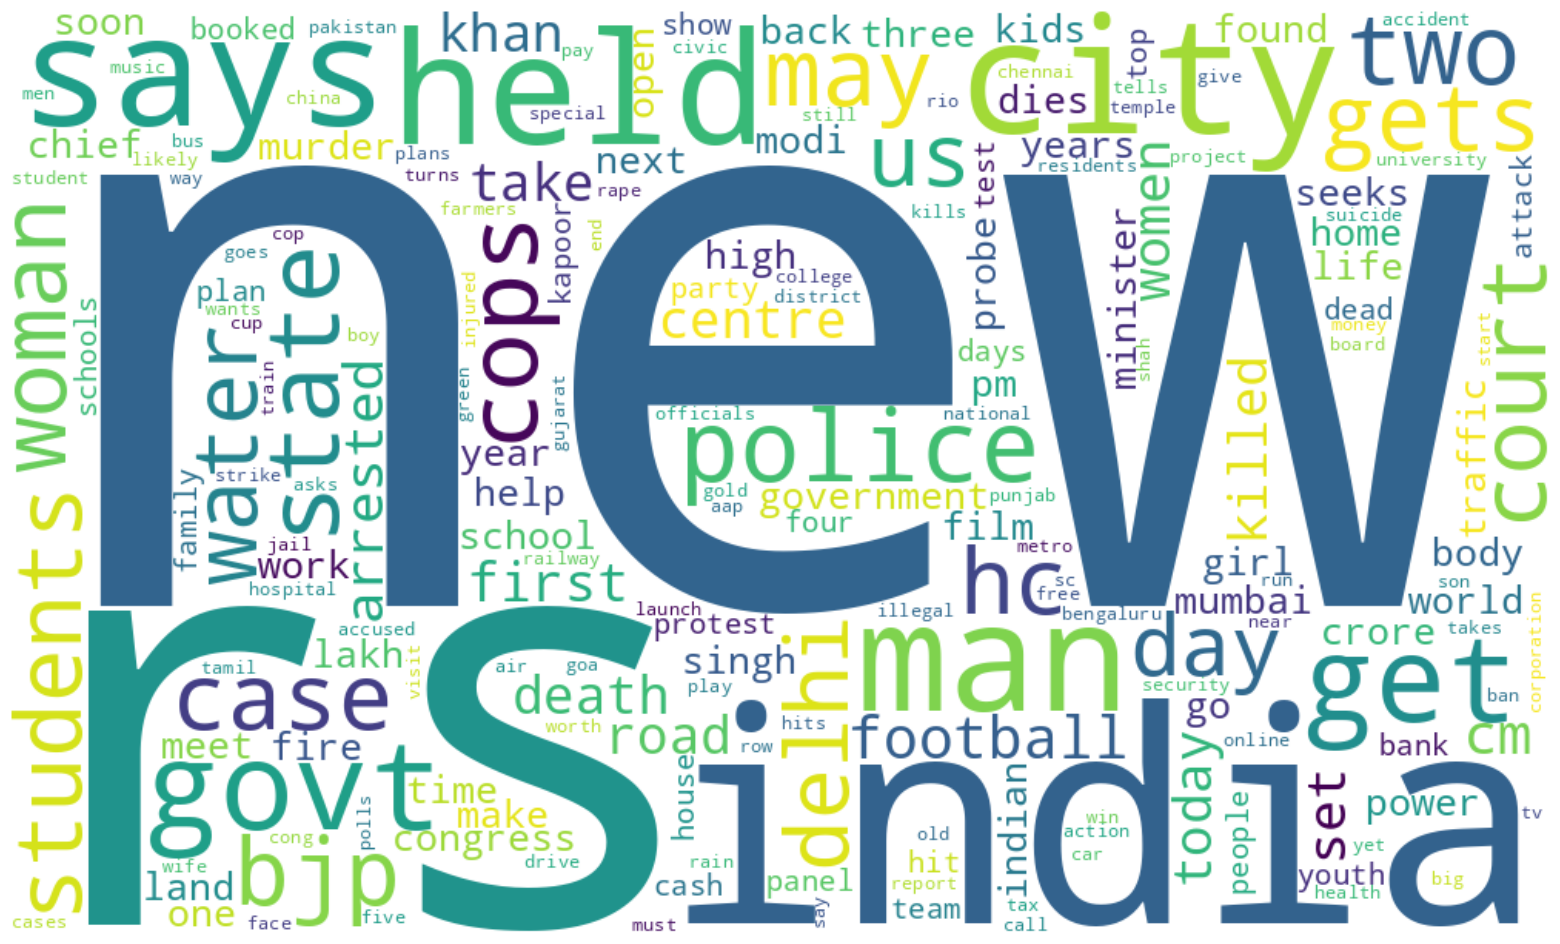

In [12]:
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Wordcloud 2**

In [13]:
from nltk import bigrams
bigrams_list = list(bigrams(filtered_words))

In [14]:
bigram_strings = [' '.join(bigram) for bigram in bigrams_list]
bigram_freq = pd.Series(bigram_strings).value_counts()

In [15]:
bigram_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(bigram_freq)

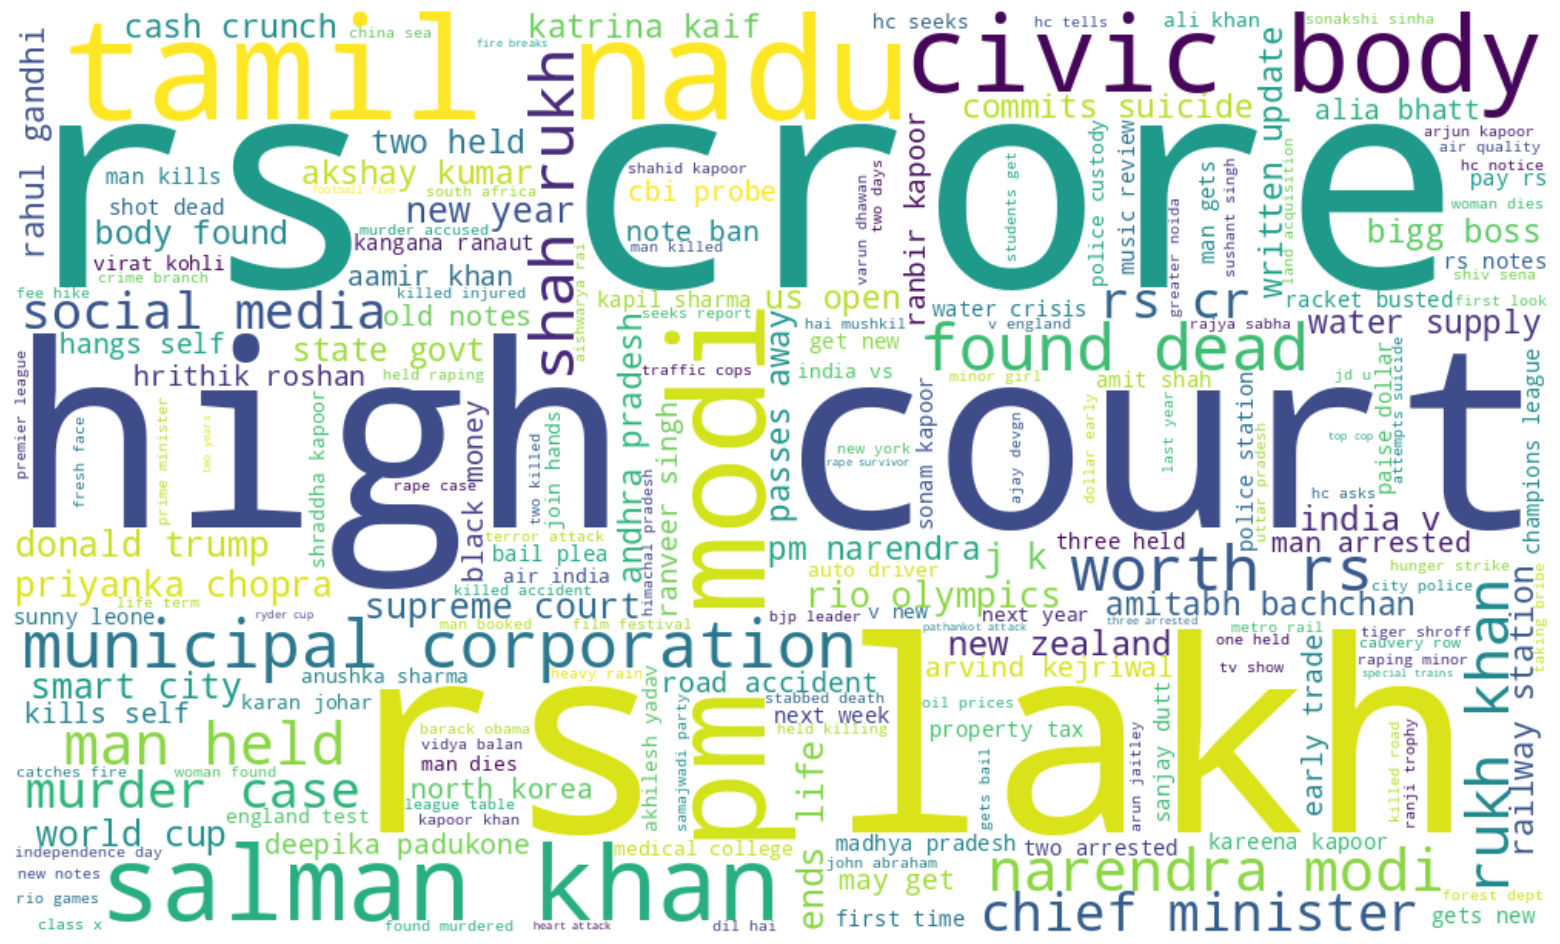

In [16]:
plt.figure(figsize=(24, 12))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Sentiment Analysis**

In [17]:
!pip install twython


ERROR: Could not find a version that satisfies the requirement twython (from versions: none)
ERROR: No matching distribution found for twython


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
sia = SentimentIntensityAnalyzer()
df_2016.loc[:, 'compound'] = df_2016['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

/tmp/ipykernel_18/4139118976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.loc[:, 'compound'] = df_2016['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [20]:
df_2016.loc[:, 'sentiment'] = df_2016['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')


/tmp/ipykernel_18/1634273996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.loc[:, 'sentiment'] = df_2016['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')


In [21]:
df_2016[['headline_text', 'compound', 'sentiment']]

,headline_text,compound,sentiment
2294541,In pics: 6 winter foods that help you lose weight,0.0000,positive
2294542,Top health and wellness trends you can adopt,0.6597,positive
2294543,Ways to undo the effects of party make-up,0.4019,positive
2294544,Woman burnt to death by husband; in-laws for d...,-0.5994,negative
2294545,Hema Malini's land allotment irks social orgs,0.0000,positive
...,...,...,...
2550446,Murray ends landmark year with win over Raonic,0.6249,positive
2550447,Hurray for the system that got Team India there,0.5719,positive
2550448,Narendra Modi makes some New Year resolutions,0.0000,positive
2550449,2016: Here's what put Pune in the news,0.0000,positive


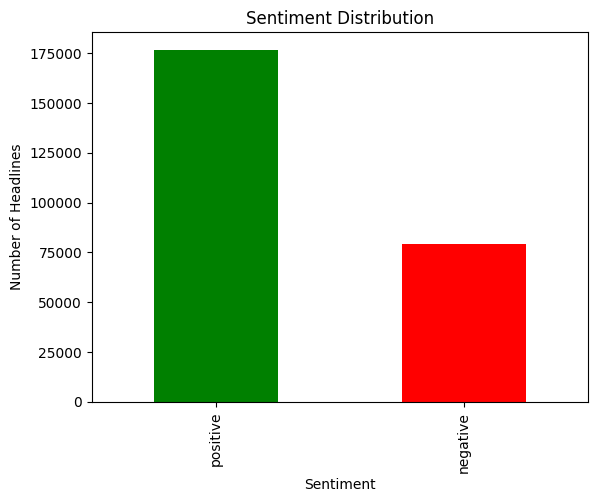

In [22]:
sentiment_distribution = df_2016['sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

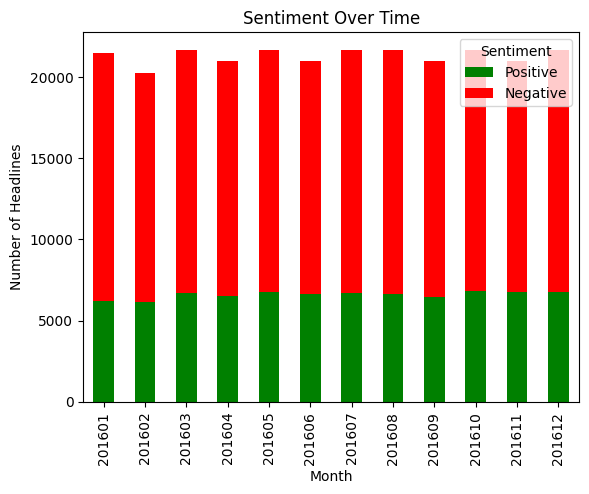

In [23]:
monthly_sentiment = df_2016.groupby('publish_month')['sentiment'].value_counts().unstack().fillna(0)
monthly_sentiment.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Headlines')
plt.legend(title='Sentiment', loc='upper right', labels=['Positive', 'Negative'])
plt.show()